# Importing packages, setting working directory, and loading file

In [1]:
try:
  import pyLDAvis
except:
  !pip install pyLDAvis==2.1.2
  import pyLDAvis
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  import tmtoolkit

import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json

try:
  from lda import LDA
except: 
  !pip install lda
  from lda import LDA

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

import pickle
import scipy.sparse

random.seed(20191120)   # to make the sampling reproducible
np.set_printoptions(precision=5)

     |████████████████████████████████| 1.6MB 5.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=c883f7efa70fe00c78b3b9c08af6a8700a7fb95f6b239915c7e6497317602256
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
     |████████████████████████████████| 7.2MB 4.9MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 25.9MB 1.6MB/s 
     |████████████████████████████████| 11.5MB 55.1MB/s 
     |████████████████████████████████| 10.4MB 14.6MB/s 
     |████████████████████████████████| 1.1MB 50.2MB/s 
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19529 sha256=fccf3c9ab3a4f00318ff31fe1e9a1701cd9830b69e15e81630cdf70a05f58905
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built globre
ERROR: albumentations 0.1.12 ha

     |████████████████████████████████| 358kB 4.2MB/s 
     |████████████████████████████████| 102kB 4.5MB/s 


In [2]:
#For all Steve Madden Reviews
working_directory = '/content/drive/MyDrive/APRD6343/TopicModeling'
json_path = "%s/allSMreviews.json" % working_directory

In [3]:
#For just Steve Madden Reviews with 2 or less stars
working_directory2 = '/content/drive/MyDrive/APRD6343/TopicModeling'
json_path = "%s/allSM3UnderRatingreviews.json" % working_directory2

In [4]:
#For just Steve Madden Reviews with 4 or more stars
working_directory3 = '/content/drive/MyDrive/APRD6343/TopicModeling'
json_path = "%s/allSMOver3Ratingreviews.json" % working_directory3

In [5]:
#For all Steve Madden Reviews
doc_labels = pickle.load(open('%s/final_labels.p' % working_directory, 'rb'))

dtm_sm = scipy.sparse.load_npz('%s/final_dtm.npz' % working_directory)
dtm_big = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

corpus = pickle.load(open('%s/corpus.p' % working_directory, 'rb'))

In [6]:
#For just Steve Madden Reviews with 2 or less stars
doc2_labels = pickle.load(open('%s/2final_labels.p' % working_directory2, 'rb'))

dtm2_sm = scipy.sparse.load_npz('%s/2final_dtm.npz' % working_directory2)
dtm2_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory2)

vocab2_bg = pickle.load(open('%s/2big_vocab.p' % working_directory2, 'rb'))
vocab2_sm = pickle.load(open('%s/2small_vocab.p' % working_directory2, 'rb'))

corpus2 = pickle.load(open('%s/2corpus.p' % working_directory2, 'rb'))

In [7]:
#For just Steve Madden Reviews with 4 or more stars
doc3_labels = pickle.load(open('%s/3final_labels.p' % working_directory3, 'rb'))

dtm3_sm = scipy.sparse.load_npz('%s/3final_dtm.npz' % working_directory3)
dtm3_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory3)

vocab3_bg = pickle.load(open('%s/3big_vocab.p' % working_directory3, 'rb'))
vocab3_sm = pickle.load(open('%s/3small_vocab.p' % working_directory3, 'rb'))

corpus3 = pickle.load(open('%s/3corpus.p' % working_directory3, 'rb'))

In [8]:
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

# Creating models

In [9]:
#For all Steve Madden Reviews

dtms = {
    'smaller': dtm_sm
}

k=5

lda_params = {
    'n_topics': 30,
    'eta': 1.3,
    'alpha': 1/(5*k),
    'n_iter': 1000,
    'random_state': 20191122
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [10]:
#For just Steve Madden Reviews with 2 or less stars

dtms2 = {
    'smaller': dtm2_sm
}

k=5

lda_params2 = {
    'n_topics': 15,
    'eta': 2,
    'alpha': 1/(7*k),
    'n_iter': 1000,
    'random_state': 20191122
}

models2 = compute_models_parallel(dtms2, constant_parameters=lda_params2)

In [11]:
#For just Steve Madden Reviews with 4 or more stars

dtms3 = {
    'smaller': dtm3_sm
}

k=5

lda_params3 = {
    'n_topics': 25,
    'eta': 1.3,
    'alpha': 1/(5*k),
    'n_iter': 1000,
    'random_state': 20191122
}

models3 = compute_models_parallel(dtms3, constant_parameters=lda_params3)

# Pulling out topic words from the models and printing the top 3

In [12]:
#For all Steve Madden Reviews
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)

topic_1
> #1. size (0.111052)
> #2. review (0.070950)
> #3. order (0.069421)
topic_2
> #1. great (0.067715)
> #2. look (0.061750)
> #3. purchase (0.058512)
topic_3
> #1. jean (0.084630)
> #2. great (0.075175)
> #3. look (0.073788)
topic_4
> #1. love (0.121898)
> #2. color (0.080254)
> #3. great (0.063117)
topic_5
> #1. heel (0.116032)
> #2. high (0.059951)
> #3. walk (0.031403)
topic_6
> #1. return (0.035245)
> #2. order (0.034601)
> #3. box (0.033569)
topic_7
> #1. size (0.171901)
> #2. order (0.081174)
> #3. small (0.078836)
topic_8
> #1. heel (0.072063)
> #2. love (0.060993)
> #3. comfortable (0.058123)
topic_9
> #1. sock (0.065539)
> #2. warm (0.050619)
> #3. legging (0.043551)
topic_10
> #1. love (0.097967)
> #2. boot (0.086879)
> #3. buy (0.065044)
topic_11
> #1. size (0.127232)
> #2. love (0.079728)
> #3. true (0.078892)
topic_12
> #1. foot (0.068641)
> #2. strap (0.058104)
> #3. ankle (0.053674)
topic_13
> #1. look (0.109810)
> #2. make (0.056617)
> #3. cheap (0.051203)
topic_1

In [13]:
#For just Steve Madden Reviews with 2 or less stars
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm2 = models2['smaller'][0][1]
print_ldamodel_topic_words(model_sm2.topic_word_, vocab2_sm, top_n=3)

topic_1
> #1. boot (0.130102)
> #2. look (0.035998)
> #3. foot (0.027778)
topic_2
> #1. legging (0.029099)
> #2. look (0.021265)
> #3. tight (0.017348)
topic_3
> #1. look (0.106766)
> #2. boot (0.058038)
> #3. cheap (0.046245)
topic_4
> #1. boot (0.108721)
> #2. color (0.035689)
> #3. look (0.027417)
topic_5
> #1. size (0.135046)
> #2. small (0.064071)
> #3. order (0.041149)
topic_6
> #1. look (0.037415)
> #2. buy (0.036892)
> #3. month (0.035845)
topic_7
> #1. foot (0.071294)
> #2. look (0.035458)
> #3. narrow (0.024519)
topic_8
> #1. pair (0.046573)
> #2. look (0.025923)
> #3. return (0.024165)
topic_9
> #1. bag (0.053903)
> #2. look (0.035316)
> #3. return (0.023234)
topic_10
> #1. sock (0.054369)
> #2. foot (0.029126)
> #3. slip (0.015534)
topic_11
> #1. size (0.056008)
> #2. order (0.038775)
> #3. return (0.027286)
topic_12
> #1. smell (0.052147)
> #2. bad (0.022239)
> #3. return (0.016104)
topic_13
> #1. time (0.046138)
> #2. buy (0.038880)
> #3. first (0.027475)
topic_14
> #1. h

In [14]:
#For just Steve Madden Reviews with 4 or more stars
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm3 = models3['smaller'][0][1]
print_ldamodel_topic_words(model_sm3.topic_word_, vocab3_sm, top_n=3)

topic_1
> #1. jean (0.083012)
> #2. look (0.080861)
> #3. great (0.076252)
topic_2
> #1. look (0.050988)
> #2. sole (0.034007)
> #3. comfortable (0.030065)
topic_3
> #1. heel (0.107334)
> #2. high (0.060595)
> #3. walk (0.036770)
topic_4
> #1. sock (0.100935)
> #2. size (0.067307)
> #3. boot (0.061430)
topic_5
> #1. foot (0.069106)
> #2. ankle (0.050421)
> #3. strap (0.043246)
topic_6
> #1. size (0.121652)
> #2. order (0.062485)
> #3. review (0.057691)
topic_7
> #1. heel (0.072691)
> #2. size (0.062334)
> #3. love (0.050794)
topic_8
> #1. warm (0.052122)
> #2. nice (0.037709)
> #3. legging (0.036634)
topic_9
> #1. boot (0.182333)
> #2. look (0.040342)
> #3. knee (0.031177)
topic_10
> #1. size (0.174146)
> #2. small (0.076203)
> #3. order (0.066682)
topic_11
> #1. pair (0.113938)
> #2. buy (0.055023)
> #3. time (0.038060)
topic_12
> #1. price (0.052492)
> #2. order (0.042534)
> #3. love (0.040377)
topic_13
> #1. size (0.111403)
> #2. true (0.076092)
> #3. love (0.054905)
topic_14
> #1. 

# Topic names and classification

In [15]:
#For all Steve Madden Reviews
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_sm = doc_lengths(dtm_sm)
topic_labels = generate_topic_labels_from_top_words(
    model_sm.topic_word_,
    model_sm.doc_topic_,
    doc_lengths_sm,
    vocab_sm,
    lambda_=0.7
)

In [16]:
#For just Steve Madden Reviews with 2 or less stars
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_sm2 = doc_lengths(dtm2_sm)
topic_labels2 = generate_topic_labels_from_top_words(
    model_sm2.topic_word_,
    model_sm2.doc_topic_,
    doc_lengths_sm2,
    vocab2_sm,
    lambda_=0.7
)

In [17]:
#For just Steve Madden Reviews with 4 or more stars
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_sm3 = doc_lengths(dtm3_sm)
topic_labels3 = generate_topic_labels_from_top_words(
    model_sm3.topic_word_,
    model_sm3.doc_topic_,
    doc_lengths_sm3,
    vocab3_sm,
    lambda_=0.7
)

In [18]:
topic_labels

array(['1_review_size_read', '2_purchase_great_happy',
       '3_jean_dress_skirt', '4_love_color_great', '5_heel_high_platform',
       '6_box_return_smell', '7_size_small_order',
       '8_heel_wedge_comfortable', '9_warm_sock_legging',
       '10_daughter_love_christmas', '11_size_true_love',
       '12_strap_ankle_foot', '13_look_cheap_make', '14_price_pay_get',
       '15_support_foot_arch', '16_foot_day_hour', '17_size_small_big',
       '18_give_star_break', '19_boot_great_look', '20_boot_brown_pair',
       '21_boot_zipper_lace', '22_boot_sock_calf', '23_color_dark_brown',
       '24_bag_love_look', '25_pair_black_buy', '26_compliment_get_many',
       '27_month_last_sole', '28_look_casual_good', '29_foot_narrow_wide',
       '30_boot_calf_knee'], dtype='<U26')

In [19]:
topic_labels2

array(['1_boot_zipper', '2_legging_fabric', '3_look_cheap',
       '4_boot_color', '5_size_small', '6_month_buy', '7_foot_narrow',
       '8_pair_purchase', '9_bag_purse', '10_sock_foot', '11_size_order',
       '12_smell_bad', '13_time_buy', '14_heel_walk', '15_cheap_buckle'],
      dtype='<U16')

In [20]:
topic_labels3

array(['1_jean_dress', '2_sole_look', '3_heel_high', '4_sock_thick',
       '5_ankle_foot', '6_size_review', '7_heel_true', '8_warm_legging',
       '9_boot_knee', '10_size_small', '11_pair_year', '12_price_order',
       '13_true_size', '14_compliment_get', '15_look_casual',
       '16_love_daughter', '17_boot_calf', '18_boot_color', '19_bag_love',
       '20_boot_zipper', '21_great_look', '22_foot_narrow',
       '23_black_one', '24_day_foot', '25_love_color'], dtype='<U17')

In [21]:
#For all Steve Madden Reviews
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
doc_topic = model_sm.doc_topic_
documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels) 

In [22]:
#For just Steve Madden Reviews with 2 or less stars
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
doc_topic2 = model_sm2.doc_topic_
documentclassifications2 = ldamodel_top_doc_topics(doc_topic2, doc2_labels, top_n=2, topic_labels=topic_labels2) 

In [23]:
#For just Steve Madden Reviews with 4 or more stars
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
doc_topic3 = model_sm3.doc_topic_
documentclassifications3 = ldamodel_top_doc_topics(doc_topic3, doc3_labels, top_n=2, topic_labels=topic_labels3) 

In [24]:
documentclassifications.head()
#Adding text would make this more helpful

,rank_1,rank_2
document,,
0,21_boot_zipper_lace (0.3818),14_price_pay_get (0.2303)
1,16_foot_day_hour (0.3171),8_heel_wedge_comfortable (0.227)
10,26_compliment_get_many (0.8389),30_boot_calf_knee (0.005556)
100,24_bag_love_look (0.4927),17_size_small_big (0.3707)
1000,10_daughter_love_christmas (0.8389),30_boot_calf_knee (0.005556)


In [25]:
documentclassifications2.head()

,rank_1,rank_2
document,,
0,6_month_buy (0.9783),15_cheap_buckle (0.00155)
1,14_heel_walk (0.9616),15_cheap_buckle (0.00274)
10,15_cheap_buckle (0.9757),14_heel_walk (0.001739)
100,8_pair_purchase (0.8337),15_cheap_buckle (0.1406)
1000,4_boot_color (0.5743),12_smell_bad (0.4105)


In [26]:
documentclassifications3.head()

,rank_1,rank_2
document,,
0,12_price_order (0.5033),18_boot_color (0.2533)
1,24_day_foot (0.621),3_heel_high (0.24)
10,11_pair_year (0.9314),25_love_color (0.002857)
100,11_pair_year (0.504),21_great_look (0.304)
1000,22_foot_narrow (0.64),12_price_order (0.1855)


# Adding text to the classifications

In [27]:
#For all Steve Madden Reviews
#Make new column in the documentclassifications data frame, 'text', setting it blank
documentclassifications['text'] = np.nan
#Row by row, write text to the document
for index, arow in documentclassifications.iterrows():
  documentclassifications['text'][index] = corpus[index]

In [28]:
#For just Steve Madden Reviews with 2 or less stars
documentclassifications2['text'] = np.nan
for index, arow in documentclassifications2.iterrows():
  documentclassifications2['text'][index] = corpus2[index]

In [29]:
#For just Steve Madden Reviews with 4 or more stars
documentclassifications3['text'] = np.nan
for index, arow in documentclassifications3.iterrows():
  documentclassifications3['text'][index] = corpus3[index]

In [30]:
#Look at one document
corpus['1']

"These sandals are extremely comfortable. I can wear and walk in these for hours and hours and my feet never hurt. Suprising for such a high heel. Plenty of cushion and very cute too. I wear them with jeans, capris, or whatever I want. Dress them up or down, but overall they're a casual shoe. The only drawback is that after wearing them awhile they get a little hot and sweaty and they make my feet stink. Unfortunately the shoes smell now too. I guess they just need to be cleaned regularly and they'll be fine. Still my favorite shoes for spring and summer."

In [31]:
corpus2['1']

"The moment they arrived I put them on and wore them around the house. 5 minutes later, the heel broke. Poor quality of shoe, but very cute. I'm bummed because they are new and now I have to take them in and pay more to have them repaired. Booo.."

In [32]:
corpus3['1']

"These sandals are extremely comfortable. I can wear and walk in these for hours and hours and my feet never hurt. Suprising for such a high heel. Plenty of cushion and very cute too. I wear them with jeans, capris, or whatever I want. Dress them up or down, but overall they're a casual shoe. The only drawback is that after wearing them awhile they get a little hot and sweaty and they make my feet stink. Unfortunately the shoes smell now too. I guess they just need to be cleaned regularly and they'll be fine. Still my favorite shoes for spring and summer."

In [33]:
documentclassifications.iloc[1]
#Printing one classification of document 1

rank_1                            16_foot_day_hour (0.3171)
rank_2                     8_heel_wedge_comfortable (0.227)
text      These sandals are extremely comfortable. I can...
Name: 1, dtype: object

In [34]:
documentclassifications2.iloc[1]

rank_1                                14_heel_walk (0.9616)
rank_2                            15_cheap_buckle (0.00274)
text      The moment they arrived I put them on and wore...
Name: 1, dtype: object

In [35]:
documentclassifications3.iloc[1]

rank_1                                  24_day_foot (0.621)
rank_2                                   3_heel_high (0.24)
text      These sandals are extremely comfortable. I can...
Name: 1, dtype: object

In [36]:
documentclassifications.iloc[1]['text']
#Look at entire text of document 1

"These sandals are extremely comfortable. I can wear and walk in these for hours and hours and my feet never hurt. Suprising for such a high heel. Plenty of cushion and very cute too. I wear them with jeans, capris, or whatever I want. Dress them up or down, but overall they're a casual shoe. The only drawback is that after wearing them awhile they get a little hot and sweaty and they make my feet stink. Unfortunately the shoes smell now too. I guess they just need to be cleaned regularly and they'll be fine. Still my favorite shoes for spring and summer."

In [37]:
documentclassifications2.iloc[1]['text']

"The moment they arrived I put them on and wore them around the house. 5 minutes later, the heel broke. Poor quality of shoe, but very cute. I'm bummed because they are new and now I have to take them in and pay more to have them repaired. Booo.."

In [38]:
documentclassifications3.iloc[1]['text']

"These sandals are extremely comfortable. I can wear and walk in these for hours and hours and my feet never hurt. Suprising for such a high heel. Plenty of cushion and very cute too. I wear them with jeans, capris, or whatever I want. Dress them up or down, but overall they're a casual shoe. The only drawback is that after wearing them awhile they get a little hot and sweaty and they make my feet stink. Unfortunately the shoes smell now too. I guess they just need to be cleaned regularly and they'll be fine. Still my favorite shoes for spring and summer."

In [39]:
documentclassifications.head()

,rank_1,rank_2,text
document,,,
0,21_boot_zipper_lace (0.3818),14_price_pay_get (0.2303),These boots are amazing. I got them because I ...
1,16_foot_day_hour (0.3171),8_heel_wedge_comfortable (0.227),These sandals are extremely comfortable. I can...
10,26_compliment_get_many (0.8389),30_boot_calf_knee (0.005556),These are great shoes and I get compliments ev...
100,24_bag_love_look (0.4927),17_size_small_big (0.3707),i love these shoes! they're red!they definitel...
1000,10_daughter_love_christmas (0.8389),30_boot_calf_knee (0.005556),Purchased these for my daughter in law and she...


In [40]:
documentclassifications2.head()

,rank_1,rank_2,text
document,,,
0,6_month_buy (0.9783),15_cheap_buckle (0.00155),I had a similar version of this shoe from abou...
1,14_heel_walk (0.9616),15_cheap_buckle (0.00274),The moment they arrived I put them on and wore...
10,15_cheap_buckle (0.9757),14_heel_walk (0.001739),I normally wear an 8.5 comfortably in Steve Ma...
100,8_pair_purchase (0.8337),15_cheap_buckle (0.1406),Bought this in the black leather. It looks goo...
1000,4_boot_color (0.5743),12_smell_bad (0.4105),I bought these in brown and black at two diffe...


In [41]:
documentclassifications3.head()

,rank_1,rank_2,text
document,,,
0,12_price_order (0.5033),18_boot_color (0.2533),These boots are amazing. I got them because I ...
1,24_day_foot (0.621),3_heel_high (0.24),These sandals are extremely comfortable. I can...
10,11_pair_year (0.9314),25_love_color (0.002857),Very comfortable shoe. Looks good and lasts l...
100,11_pair_year (0.504),21_great_look (0.304),Just break them in and they re comfortable. Wi...
1000,22_foot_narrow (0.64),12_price_order (0.1855),It really is a beautiful shoe and I loved them...


In [42]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('size')]
lookup.head()
#Look at all reviews with a certain word

Results:


,rank_1,rank_2,text
document,,,
100,24_bag_love_look (0.4927),17_size_small_big (0.3707),i love these shoes! they're red!they definitel...
10011,22_boot_sock_calf (0.4927),17_size_small_big (0.3707),"These are terrible. I have size 10.5 feet, an..."
10019,9_warm_sock_legging (0.7721),27_month_last_sole (0.1254),"These leggings are very soft, and they're the ..."
10024,19_boot_great_look (0.5611),23_color_dark_brown (0.2833),"Boots are amazing, look great and the shopping..."
1003,4_love_color_great (0.2845),22_boot_sock_calf (0.2845),"I like the style of the boot, but the quality ..."


In [43]:
print('Results:')
lookup2 = documentclassifications2[documentclassifications2['text'].str.contains('size')]
lookup2.head()

Results:


,rank_1,rank_2,text
document,,,
100,8_pair_purchase (0.8337),15_cheap_buckle (0.1406),Bought this in the black leather. It looks goo...
1004,1_boot_zipper (0.8775),5_size_small (0.09),"Fit true to size, nice boots but calves are q..."
1005,5_size_small (0.6055),4_boot_color (0.3827),First let me preface by saying: I have bought ...
1008,1_boot_zipper (0.5251),2_legging_fabric (0.4634),I ordered these boots in what is normally a ha...
1012,5_size_small (0.7013),15_cheap_buckle (0.2813),at least this pair. I love Steve Madden shoes...


In [44]:
print('Results:')
lookup3 = documentclassifications3[documentclassifications3['text'].str.contains('size')]
lookup3.head()

Results:


,rank_1,rank_2,text
document,,,
10005,10_size_small (0.815),15_look_casual (0.065),I love these shoes! Look fantastic with my sui...
10007,7_heel_true (0.4343),15_look_casual (0.4343),I chose this as an anniversary present for my ...
1001,10_size_small (0.5743),1_jean_dress (0.2171),Have this in blue and LOVE it! Beautiful and f...
10012,23_black_one (0.5876),6_size_review (0.3462),The shoe is the most beautiful and classy one ...
1002,4_sock_thick (0.4729),24_day_foot (0.4729),"Very, very classy casual shoe. I got a size 8M..."


In [45]:
#To sort and look at the document classifications in excel
documentclassifications.to_excel('%s/topics.documentclassification.xlsx' % working_directory)
documentclassifications.to_excel('%s/topics.documentclassification2.xlsx' % working_directory)
documentclassifications.to_excel('%s/topics.documentclassification3.xlsx' % working_directory)

# Visualizing the classifications

In [46]:
#For all Steve Madden reviews
from tmtoolkit.topicmod.visualize import parameters_for_ldavis
#Generates parameters to be fed into LDA visualizations
ldavis_params = parameters_for_ldavis(model_sm.topic_word_,
                                      model_sm.doc_topic_,
                                      dtm_sm,
                                      vocab_sm)

In [47]:
#For just Steve Madden Reviews with 2 or less stars
from tmtoolkit.topicmod.visualize import parameters_for_ldavis
ldavis_params2 = parameters_for_ldavis(model_sm2.topic_word_,
                                      model_sm2.doc_topic_,
                                      dtm2_sm,
                                      vocab2_sm)

In [48]:
#For just Steve Madden Reviews with 4 or more stars
from tmtoolkit.topicmod.visualize import parameters_for_ldavis
ldavis_params3 = parameters_for_ldavis(model_sm3.topic_word_,
                                      model_sm3.doc_topic_,
                                      dtm3_sm,
                                      vocab3_sm)

In [49]:
#For all Steve Madden reviews
%matplotlib inline
vis = pyLDAvis.prepare(**ldavis_params)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis)

In [50]:
#For just Steve Madden Reviews with 2 or less stars
%matplotlib inline
vis2 = pyLDAvis.prepare(**ldavis_params2)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis2)

In [51]:
#For just Steve Madden Reviews with 4 or more stars
%matplotlib inline
vis3 = pyLDAvis.prepare(**ldavis_params3)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis3)

In [52]:
#For all Steve Madden reviews
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

#Options for the wordcloud output
img_w = 400   # image width
img_h = 300   # image height

topic_clouds = generate_wordclouds_for_topic_words(
    model_sm.topic_word_, vocab_sm,
    top_n=20, topic_labels=topic_labels,
    width=img_w, height=img_h
)

# show all generated word clouds
topic_clouds.keys()

dict_keys(['1_review_size_read', '2_purchase_great_happy', '3_jean_dress_skirt', '4_love_color_great', '5_heel_high_platform', '6_box_return_smell', '7_size_small_order', '8_heel_wedge_comfortable', '9_warm_sock_legging', '10_daughter_love_christmas', '11_size_true_love', '12_strap_ankle_foot', '13_look_cheap_make', '14_price_pay_get', '15_support_foot_arch', '16_foot_day_hour', '17_size_small_big', '18_give_star_break', '19_boot_great_look', '20_boot_brown_pair', '21_boot_zipper_lace', '22_boot_sock_calf', '23_color_dark_brown', '24_bag_love_look', '25_pair_black_buy', '26_compliment_get_many', '27_month_last_sole', '28_look_casual_good', '29_foot_narrow_wide', '30_boot_calf_knee'])

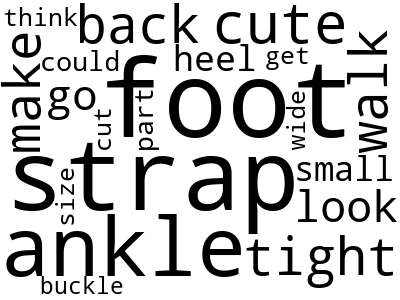

In [53]:
topic_clouds['12_strap_ankle_foot']

In [54]:
#For just Steve Madden Reviews with 2 or less stars
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

img_w = 400   # image width
img_h = 300   # image height

topic_clouds2 = generate_wordclouds_for_topic_words(
    model_sm2.topic_word_, vocab2_sm,
    top_n=20, topic_labels=topic_labels2,
    width=img_w, height=img_h
)

topic_clouds2.keys()

dict_keys(['1_boot_zipper', '2_legging_fabric', '3_look_cheap', '4_boot_color', '5_size_small', '6_month_buy', '7_foot_narrow', '8_pair_purchase', '9_bag_purse', '10_sock_foot', '11_size_order', '12_smell_bad', '13_time_buy', '14_heel_walk', '15_cheap_buckle'])

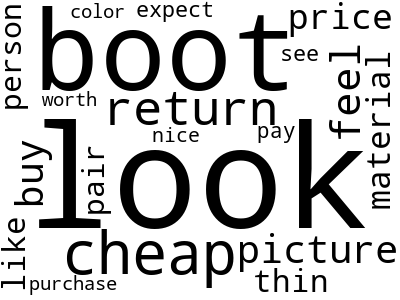

In [55]:
topic_clouds2['3_look_cheap']

In [56]:
#For just Steve Madden Reviews with 4 or more stars
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

img_w = 400   # image width
img_h = 300   # image height

topic_clouds3 = generate_wordclouds_for_topic_words(
    model_sm3.topic_word_, vocab3_sm,
    top_n=20, topic_labels=topic_labels3,
    width=img_w, height=img_h
)

topic_clouds3.keys()

dict_keys(['1_jean_dress', '2_sole_look', '3_heel_high', '4_sock_thick', '5_ankle_foot', '6_size_review', '7_heel_true', '8_warm_legging', '9_boot_knee', '10_size_small', '11_pair_year', '12_price_order', '13_true_size', '14_compliment_get', '15_look_casual', '16_love_daughter', '17_boot_calf', '18_boot_color', '19_bag_love', '20_boot_zipper', '21_great_look', '22_foot_narrow', '23_black_one', '24_day_foot', '25_love_color'])

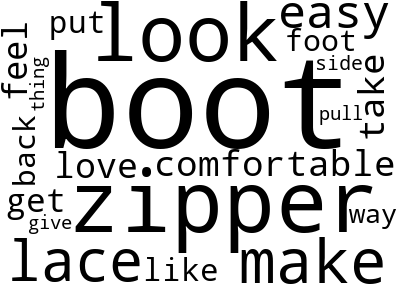

In [57]:
topic_clouds3['20_boot_zipper']